### Random Forest Classifier (Heart Disease Cleavland dataset)

# see github for dataset

#helper functions for univariate analysis

In [ ]:
#@title Do the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, accuracy_score
from sklearn.tree import plot_tree


In [ ]:
#@title Load the dataset
df = pd.read_excel('heart_disease_cleveland.xlsx')
df.head()

,Age,Sex,CP,Tresbps,Chol,FBS,Restesg,Thalach,Exang,Oldpea,Slope,Ca,Thal,Num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
#@title Explore the data given

# getting the type
print("1. Data type of the data we read is: ")
print(type(df))

# getting the top 5 values
print("\n\n2. Here are your top 5 rows; You can also give an int to head()")
display(df.head())

# getting the bottom 5 values
print("\n\n3. Here are your bottom 5 rows; You can also give an int to tail() ")
display(df.tail())

# finding the length of the data frame (how many rows are there in the data frame)
print("\n\n4. Here is the length (number of rows) of the dataframe ")
print(len(df))

# finding the column list
print("\n\n5. Here are the column names of the dataframe; and the default datatype (Index) of the column list")
x = df.columns
print(type(x))
print(x)

# finding the row (index) list
print("\n\n6. Here are the row names of the dataframe; and the datatype (RangeIndex) of the row list.")
x = df.index
print(type(x))
print(x)



print("\n\n7. info summary about the data frame, this also lists the non-null count for each column")
print(df.info())

print("\n\n8. data types in the data frame")
print(df.dtypes)


print("\n\n9. Number of rows and columns in the dataframe")
#row_count, column_count = df.shape
row_count = df.shape[0]
column_count = df.shape[1]
print('Rows:', row_count, 'Columns:', column_count)


nan_in_df = df.isnull().values.any()
print("\n\n10. Are there any missing values in the dataframe", nan_in_df)

df_stats = df.describe()
print("\n\n11. Descriptive Statistics of the dataframe (only numerical columns)\n", df_stats)


# Select only the categorical columns
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_stats = categorical_df.describe()

print("\n\n12. Descriptive Statistics of the dataframe (only categorical columns)\n", categorical_stats)


1. Data type of the data we read is: 
<class 'pandas.core.frame.DataFrame'>


2. Here are your top 5 rows; You can also give an int to head()


,Age,Sex,CP,Tresbps,Chol,FBS,Restesg,Thalach,Exang,Oldpea,Slope,Ca,Thal,Num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0




3. Here are your bottom 5 rows; You can also give an int to tail() 


,Age,Sex,CP,Tresbps,Chol,FBS,Restesg,Thalach,Exang,Oldpea,Slope,Ca,Thal,Num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0




4. Here is the length (number of rows) of the dataframe 
303


5. Here are the column names of the dataframe; and the default datatype (Index) of the column list
<class 'pandas.core.indexes.base.Index'>
Index(['Age', 'Sex', 'CP', 'Tresbps', 'Chol', 'FBS', 'Restesg', 'Thalach',
       'Exang', 'Oldpea', 'Slope', 'Ca', 'Thal', 'Num'],
      dtype='object')


6. Here are the row names of the dataframe; and the datatype (RangeIndex) of the row list.
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=303, step=1)


7. info summary about the data frame, this also lists the non-null count for each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      303 non-null    int64  
 1   Sex      303 non-null    int64  
 2   CP       303 non-null    int64  
 3   Tresbps  303 non-null    int64  
 4   Chol     303 non-null    int64  
 

In [ ]:
#@title Are there any ? Values?
# Check for "?" values in all columns
has_question_mark = df.isin(['?']).any()

# Display columns with "?" values
columns_with_question_mark = has_question_mark[has_question_mark].index.tolist()
print("Columns with '?' values:", columns_with_question_mark)


Columns with '?' values: ['Ca', 'Thal']


In [ ]:
#@title Preprocess the ? values
# Fill those values with Null - Replace "?" values with NaN
df.replace('?', pd.NA, inplace=True)

# Check whether [Ca] and [Thal] value counts
display("Ca Value Counts: ", df['Ca'].value_counts())
display("Thal Value Counts: ", df['Thal'].value_counts())

'Ca Value Counts: '

Ca
0    176
1     65
2     38
3     20
Name: count, dtype: int64

'Thal Value Counts: '

Thal
3    166
7    117
6     18
Name: count, dtype: int64

In [ ]:
#@title Are there any string values in Num column
display(df['Num'].value_counts())

Num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

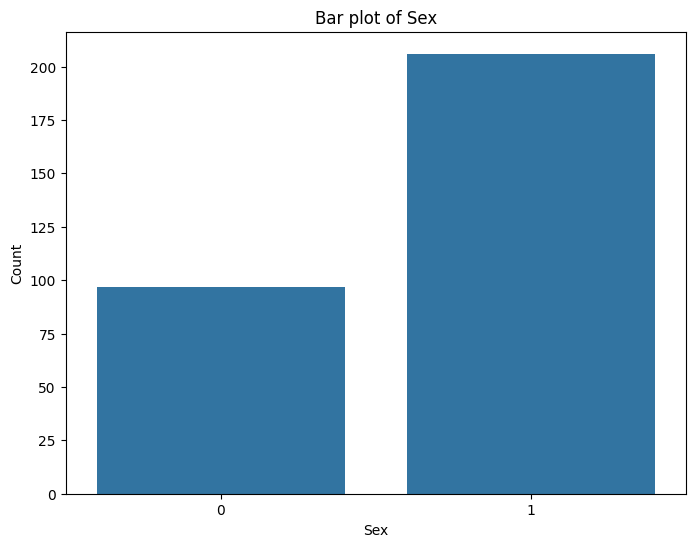

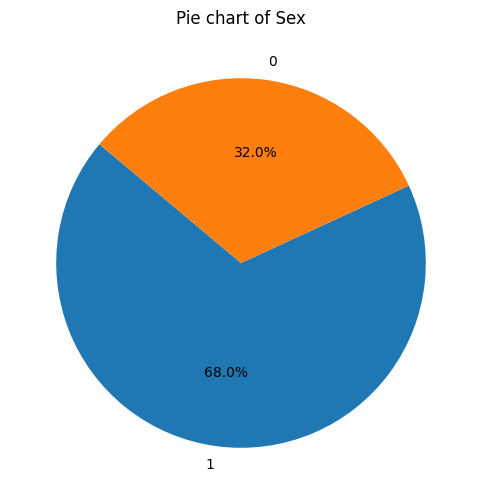

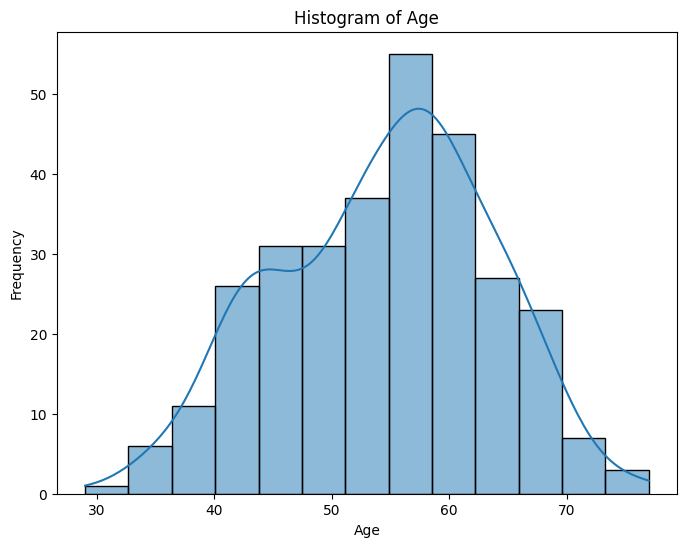

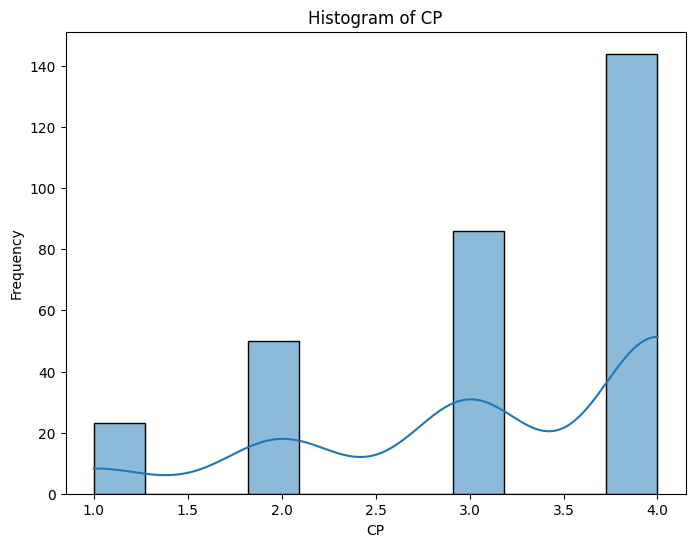

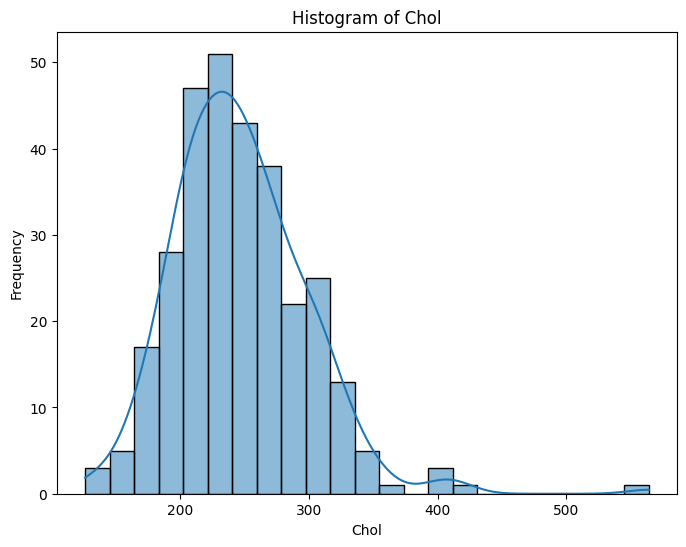

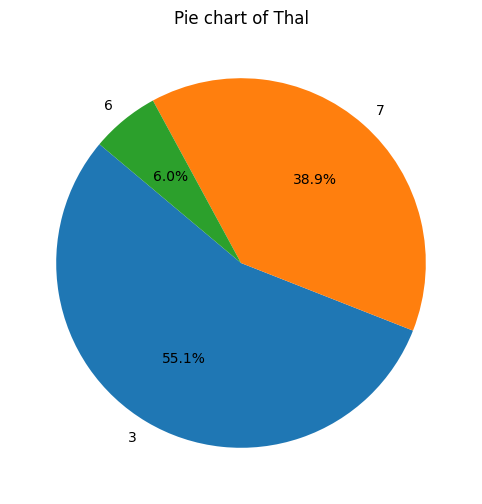

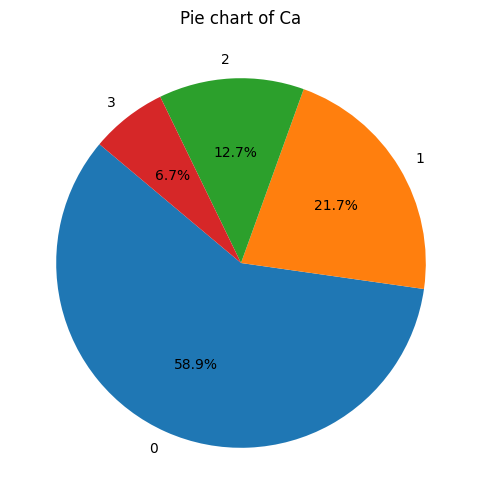

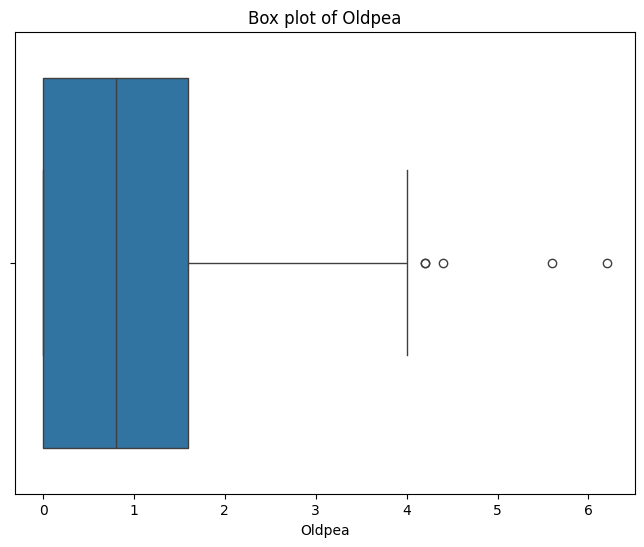

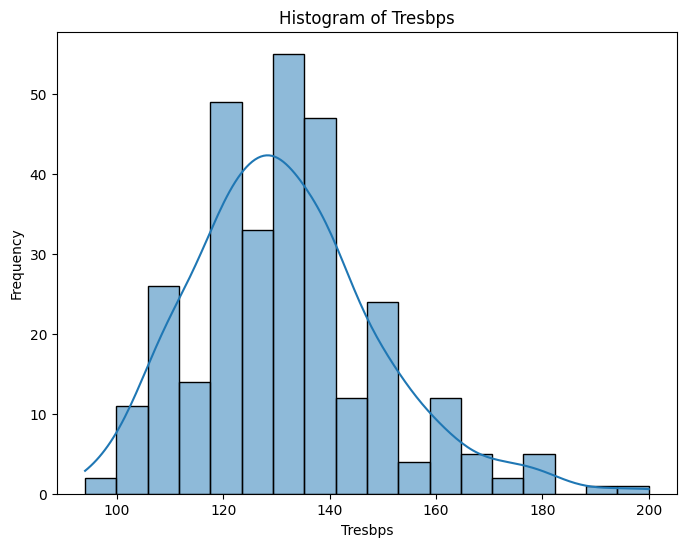

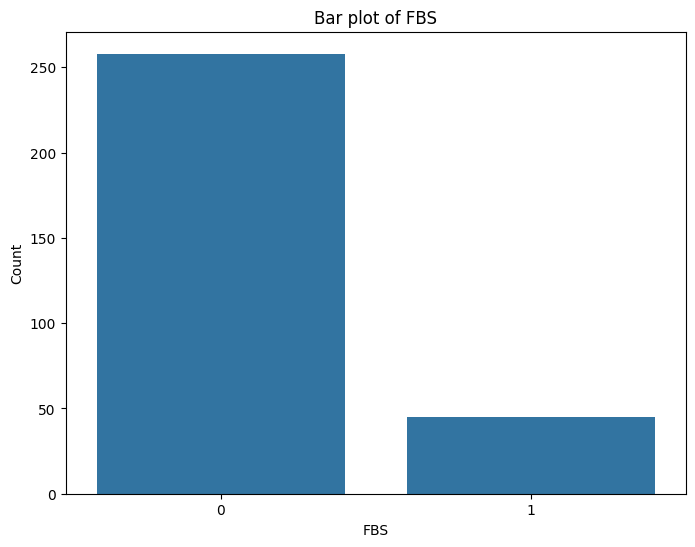

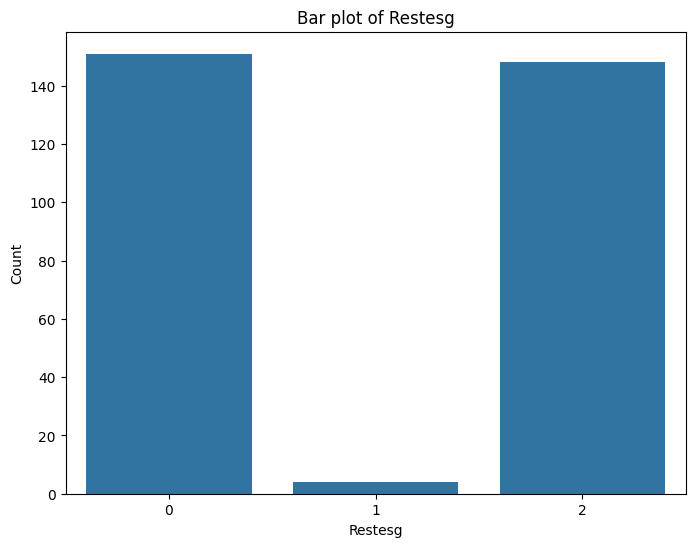

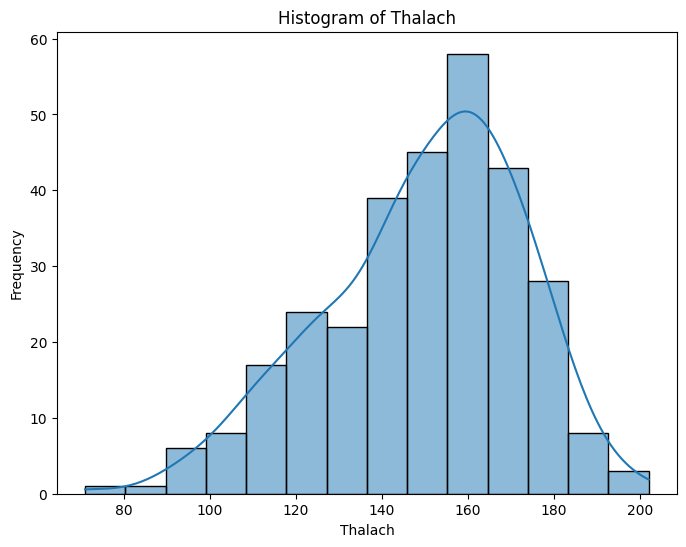

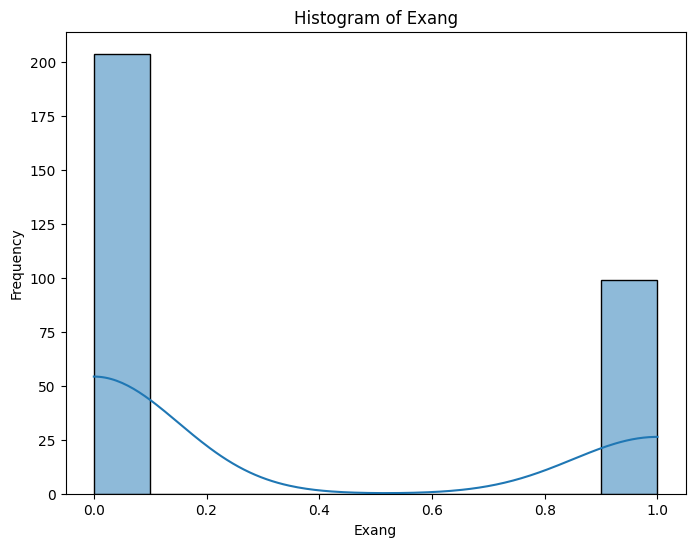

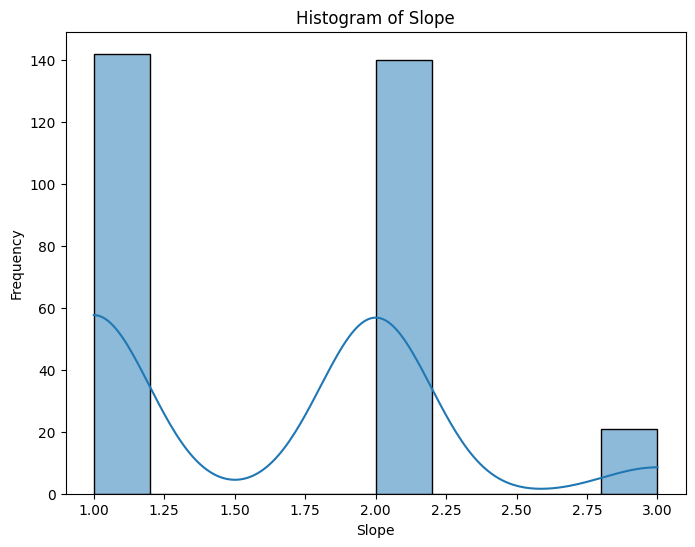

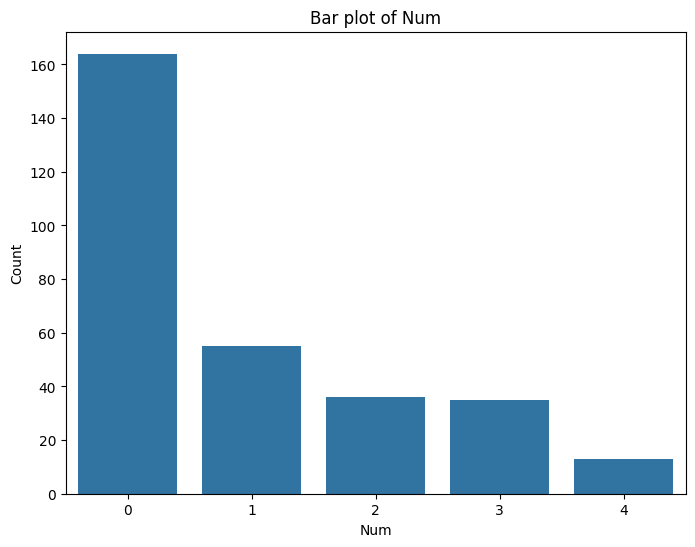

In [ ]:
#@title Visualziations: Univariate analysis
# Bar plot
def plot_bar(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Histogram
def plot_histogram(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pie chart
def plot_pie(data, column):
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart of {column}')
    plt.ylabel('')
    plt.show()

# Box plot
def plot_box(data, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=data)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

# Creating different visualizations using the helper functions
plot_bar(df, 'Sex')
plot_pie(df, 'Sex')
plot_histogram(df, 'Age')
plot_histogram(df, 'CP')
plot_histogram(df, 'Chol')
plot_pie(df, 'Thal')
plot_pie(df, 'Ca')
plot_box(df, 'Oldpea')
plot_histogram(df, 'Tresbps')
plot_bar(df, 'FBS')
plot_bar(df, 'Restesg')
plot_histogram(df, 'Thalach')
plot_histogram(df, 'Exang')
plot_histogram(df, 'Slope')
plot_bar(df, 'Num')

In [ ]:
#@title Encode all the string data
print("Before encoding of the columns")
print(df.info())

# Create a label encoder object
label_encoder = LabelEncoder()

# Assuming your dataframe is named heart_disease_cleveland

# Convert 'Ca' and 'Thal' columns to numerical data using label encoding
df['Ca'] = label_encoder.fit_transform(df['Ca'].astype(str))
df['Thal'] = label_encoder.fit_transform(df['Thal'].astype(str))

# Verify the conversion
print(df.head())

# verify the data types now
print("After encoding of the columns")
print(df.info())


Before encoding of the columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      303 non-null    int64  
 1   Sex      303 non-null    int64  
 2   CP       303 non-null    int64  
 3   Tresbps  303 non-null    int64  
 4   Chol     303 non-null    int64  
 5   FBS      303 non-null    int64  
 6   Restesg  303 non-null    int64  
 7   Thalach  303 non-null    int64  
 8   Exang    303 non-null    int64  
 9   Oldpea   303 non-null    float64
 10  Slope    303 non-null    int64  
 11  Ca       303 non-null    int64  
 12  Thal     303 non-null    int64  
 13  Num      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   Age  Sex  CP  Tresbps  Chol  FBS  Restesg  Thalach  Exang  Oldpea  Slope  \
0   63    1   1      145   233    1        2      150      0     2.3      3   
1   67    1   4      160   286    0      

In [ ]:
#@title Separate the features and target
# Split the dataframe vertically

# Features: all columns except 'Num'
features = df.drop(columns=['Num'])

# Target variable: 'Num' column
target = df['Num']

# Display the shapes of features and target
print("Shape of features:", features.shape)
print("Shape of target:", target.shape)

# display the features df
display("Features dataframe: ", features.head())

# display the targets
display("Target series", target.head())

Shape of features: (303, 13)
Shape of target: (303,)


'Features dataframe: '

,Age,Sex,CP,Tresbps,Chol,FBS,Restesg,Thalach,Exang,Oldpea,Slope,Ca,Thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0


'Target series'

0    0
1    2
2    1
3    0
4    0
Name: Num, dtype: int64

In [ ]:
#@title Build the model

# set the X, y
X, y = features, target

#Split the dataset into training and testing sets (80 - 20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building the model without scaling of the data
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
#@title Train the model

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
#@title Calculate precision and recall

# Calculate precision and recall for each class
precision = precision_score(y_test, y_pred, average=None, zero_division= 0)
recall = recall_score(y_test, y_pred, average=None, zero_division= 0)

print("Precision for each class:", precision)
print("Recall for each class:", recall)

# Get the unique class labels from the target variable
print("\n\nDisplay the precision and recall for each class value")
class_labels = sorted(y_test.unique())

# Print the class labels along with precision and recall
for i, label in enumerate(class_labels):
    print(f"Class {label}: Precision = {precision[i]}, Recall = {recall[i]}")

Precision for each class: [0.73684211 0.2        0.14285714 0.         0.        ]
Recall for each class: [0.96551724 0.16666667 0.11111111 0.         0.        ]


Display the precision and recall for each class value
Class 0: Precision = 0.7368421052631579, Recall = 0.9655172413793104
Class 1: Precision = 0.2, Recall = 0.16666666666666666
Class 2: Precision = 0.14285714285714285, Recall = 0.1111111111111111
Class 3: Precision = 0.0, Recall = 0.0
Class 4: Precision = 0.0, Recall = 0.0


In [ ]:
#@title Calculate accuracy

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print("Accuracy:", accuracy)

print("An accuracy of 0.508 means that approximately 50.82% of the instances in your test dataset were classified correctly by the model.")

Accuracy: 0.5081967213114754
An accuracy of 0.508 means that approximately 50.82% of the instances in your test dataset were classified correctly by the model.


Number of decision trees:  100


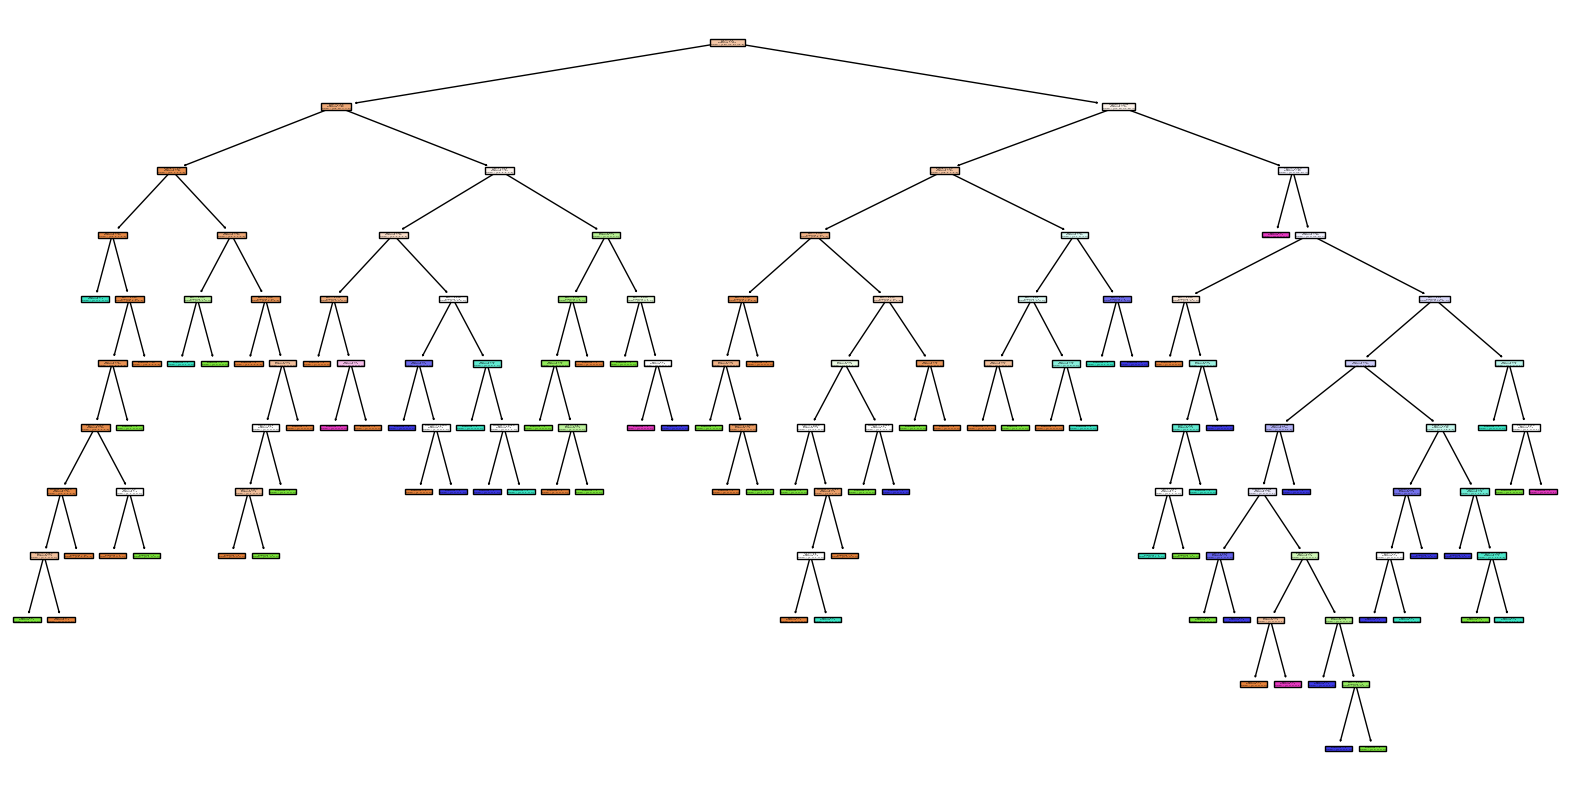

In [ ]:
#@title Display the first decision tree used by the model:
# Access the first decision tree in the ensemble
print("Number of decision trees: ", len(model.estimators_))
first_tree = model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=X.columns)
plt.show()


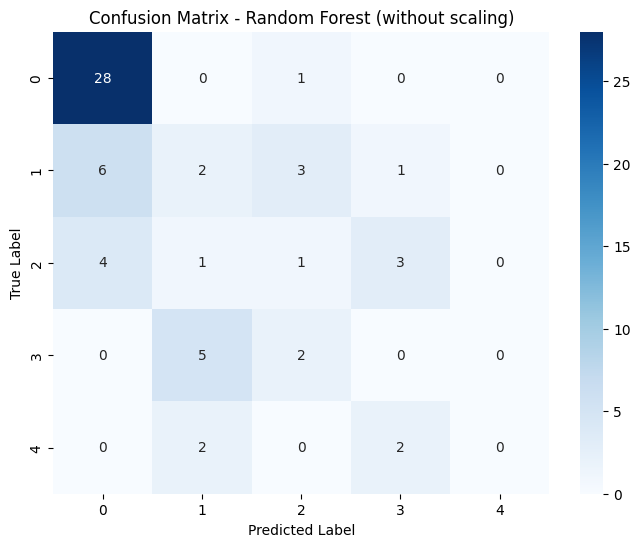

In [ ]:
#@title Calculate and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
# Assuming you have already defined y_pred
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (without scaling)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
#@title Analyze the confusion matrix
print("Confusion Matrix: \n")
for idx, class_elem in enumerate(conf_matrix):
  print(f"Class {idx}: {class_elem}")

Confusion Matrix: 

Class 0: [28  0  1  0  0]
Class 1: [6 2 3 1 0]
Class 2: [4 1 1 3 0]
Class 3: [0 5 2 0 0]
Class 4: [0 2 0 2 0]


# interpretation of the confusion matrix

The confusion matrix is a 5x5 matrix representing the performance of a classifier with five classes. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

Here's the breakdown:

**Class 0**: The first row indicates the instances of class 0 (the first class). Out of 29 instances of class 0, the classifier correctly predicted 28 instances as class 0 and misclassified 1 instance as class 2.

**Class 1**: The second row indicates the instances of class 1 (the second class). Out of 12 instances of class 1, the classifier correctly predicted 2 instances as class 1, misclassified 6 instances as class 0, misclassified 3 instances as class 2, and misclassified 1 instance as class 3.

**Class 2**: The third row indicates the instances of class 2 (the third class). Out of 9 instances of class 2, the classifier correctly predicted 1 instance as class 2, misclassified 4 instances as class 0, misclassified 1 instance as class 1, and misclassified 3 instances as class 3.

**Class 3**: The fourth row indicates the instances of class 3 (the fourth class). Out of 7 instances of class 3, the classifier correctly predicted 0 instances as class 3, misclassified 5 instances as class 1, misclassified 2 instances as class 2, and correctly predicted 0 instances as class 4.

**Class 4**: The fifth row indicates the instances of class 4 (the fifth class). Out of 4 instances of class 4, the classifier correctly predicted 0 instances as class 4, misclassified 2 instances as class 1, correctly predicted 0 instances as class 2, and misclassified 2 instances as class 3.

In summary, each cell in the confusion matrix represents the number of instances that were classified correctly or misclassified for each class. It provides valuable insights into the performance of the classifier for each class.









# Interpretation of precision and recall

**Precision for each class**: Precision measures the accuracy of the positive predictions for each class.

**Recall for each class**: Recall measures the ability of the classifier to find all the positive samples for each class.

**Note**: For some classes (in our case for the class 3 and 4), the precision and recall values are be 0. This can happen when there are no predicted samples for that class, resulting in an ill-defined precision and recall.

**Class 0**:

Precision = 0.737: This means that 73.7% of the instances predicted as class 0 are actually class 0.

Recall = 0.966: This means that 96.6% of the actual class 0 instances are correctly classified as class 0.

**Class 1:**

Precision = 0.2: This means that only 20% of the instances predicted as class 1 are actually class 1.

Recall = 0.167: This means that only 16.7% of the actual class 1 instances are correctly classified as class 1.

**Class 2:**

Precision = 0.143: This means that only 14.3% of the instances predicted as class 2 are actually class 2.

Recall = 0.111: This means that only 11.1% of the actual class 2 instances are correctly classified as class 2.

**Class 3:**

Precision = 0.0: This indicates that there are no instances predicted as class 3. Hence, precision is 0.

Recall = 0.0: Similarly, there are no instances of class 3 correctly classified. Hence, recall is 0.

**Class 4:**

Precision = 0.0: This indicates that there are no instances predicted as class 4. Hence, precision is 0.

Recall = 0.0: Similarly, there are no instances of class 4 correctly classified. Hence, recall is 0.

In summary, precision measures the accuracy of the positive predictions for each class, while recall measures the ability of the classifier to find all the positive samples for each class.
